# Weekly Covid Charts - Regional Groups

Author: Brian L. Fuller
Date Begun: 2020-10-16

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib.dates as mdates

import bqplot
from bqplot import pyplot as plt

import support

## Read the virus data

The virus data comes from a NY Times github repo. it's located at:

https://github.com/nytimes/covid-19-data

with article at:

https://www.nytimes.com/article/coronavirus-county-data-us.html

The data is pulled from the NYTimes github repo and should be located at the same level as this repo to be properly accessed. User must pull that repo in order to utilize updated numbers in this notebook.


In [2]:
# paths

rootpath = Path('..')

datapath = rootpath / 'data'

path_covid_data_us_counties = rootpath / '..' / 'covid-19-data' / 'us-counties.csv'

### Update this line
county_data_path = path_covid_data_us_counties

df_covid_data_us_counties = pd.read_csv(county_data_path, parse_dates=True)

# put fips=36061 as fips code for NYC
df_covid_data_us_counties.loc[df_covid_data_us_counties.county == "New York City", 'fips'] = 36061

# for now, get rid of null fips
df_covid = df_covid_data_us_counties[df_covid_data_us_counties.fips.notna()]

# convert the fips column to an int
df_covid['fips'] = df_covid['fips'].astype(int)

# convert the date column to a date-time
df_covid['date'] = pd.to_datetime(df_covid['date'])

## Regions

- DC Metro Area
- Tampa Metro Area
- Others?

### DC Metro - Virginia Counties:

- Culpeper county, va (51047) | 51859
- Fauquier county, va (51061) | 70675
- Spotsylvania county, va(51177) | 134238
- Stafford county, va (51179) | 149960
- Prince William county, va (51153) | 468011
- Fairfax county, va (51059)| 1150800
- Loudoun county, va (51107)| 406850
- Arlington county, va (51013) | 237521

### DC Metro - Independent Virginia Cities:

- City of Fredericksburg, VA (51630) | 29144
- City of Manassas, VA (51683) | 41641
- City of Fairfax, VA (51600) | 24574
- City of Falls Church, VA (51610) | 14772
- City of Alexandria, VA (51510) | 160530

### DC Metro - Federal District:

- District of Columbia, DC (11000, 11001, 11000) | 702455

### DC Metro - Maryland Counties:

- Charles county, md (24017) | 161503
- Prince Georges county, md (24033) | 909308
- Montgomery county, md (24031) | 1052570
- Howard county, md (24027) | 323196
- Anne Arundel county, md (fips 24003) | 576031
- Frederick county, md (24021) | 255648

https://worldpopulationreview.com/us-counties/states/va
https://worldpopulationreview.com/us-counties/states/dc
https://worldpopulationreview.com/us-counties/states/md


total pop (2020) = 6,921,286

### Tampa Metro - Florida Counties:

- Hillsborough County, FL (12057), pop = 1,436,890
- Pinellas (12103), pop = 975,280
- Pasco (12101), pop = 539,630

total pop = 2,951,800 (2020)

population from https://worldpopulationreview.com/us-counties/states/fl

In [3]:
# entity setup
culpeper = {'name': "Culpeper County, VA",          'pop':   51859, 'fips': [51047], 'state': 'VA', 'county': "Culpeper",       'group': "DC Metro"}
fauquier = {'name': "Fauquier County, VA",          'pop':   70675, 'fips': [51061], 'state': 'VA', 'county': "Fauquier",       'group': "DC Metro"}
spotsylvania = {'name': "Spotsylvania County, VA",  'pop':  134238, 'fips': [51177], 'state': 'VA', 'county': "Spotsylvania",   'group': "DC Metro"}
stafford = {'name': "Stafford County, VA",          'pop':  149960, 'fips': [51179], 'state': 'VA', 'county': "Stafford",       'group': "DC Metro"}
pr_william = {'name': "Prince William Country, VA", 'pop':  468011, 'fips': [51153], 'state': 'VA', 'county': "Prince William", 'group': "DC Metro"}
fairfax = {'name': "Fairfax County, VA",            'pop': 1150800, 'fips': [51059], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}
loudoun = {'name': "Loudoun County, VA",            'pop':  406850, 'fips': [51107], 'state': 'VA', 'county': "Loudoun",        'group': "DC Metro"}
arlington = {'name': "Arlington County, VA",        'pop':  237521, 'fips': [51013], 'state': 'VA', 'county': "Arlington",      'group': "DC Metro"}

fredericksburg = {'name': "Fredericksburg, VA",     'pop':  29144, 'fips': [51630], 'state': 'VA', 'county': "Spotsylvania",   'group': "DC Metro"}
manassas = {'name': "Manassas, VA",                 'pop':  41641, 'fips': [51683], 'state': 'VA', 'county': "Prince William", 'group': "DC Metro"}
fairfax_city = {'name': "Fairfax City, VA",         'pop':  24574, 'fips': [51600], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}
falls_church = {'name': "City of Falls Church, VA", 'pop':  14772, 'fips': [51610], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}
alexandria = {'name': "City of Alexandria, VA",     'pop': 160530, 'fips': [51510], 'state': 'VA', 'county': "Fairfax",        'group': "DC Metro"}

dc = {'name': "District of Columbia", 'pop': 702455, 'fips': [11000, 11001], 'state': 'DC', 'county': "DC", 'group': "DC Metro"}

charles = {'name': "Charles County, MD",           'pop':  161503, 'fips': [24017], 'state': 'MD', 'county': "Charles",       'group': "DC Metro"}
pr_george = {'name': "Prince Georges County, MD",  'pop':  909308, 'fips': [24033], 'state': 'MD', 'county': "Prince George", 'group': "DC Metro"}
montgomery = {'name': "Montgomery County, MD",     'pop': 1052570, 'fips': [24031], 'state': 'MD', 'county': "Montgomery",    'group': "DC Metro"}
howard = {'name': "Howard County, MD",             'pop':  323196, 'fips': [24027], 'state': 'MD', 'county': "Howard",        'group': "DC Metro"}
anne_arundel = {'name': "Anne Arundel County, MD", 'pop':  576031, 'fips': [24003], 'state': 'MD', 'county': "Anne Arundel",  'group': "DC Metro"}
frederick = {'name': "Frederick County, MD",       'pop':  255648, 'fips': [24021], 'state': 'MD', 'county': "Frederick",     'group': "DC Metro"}

hillsborough = {'name': "Hillsborough County, FL", 'pop':  1436890, 'fips': [12057], 'state': 'FL', 'county': "Hillsborough", 'group': "Tampa Bay-Area"}
pinellas = {'name': "Pinellas County, FL",         'pop':   975280, 'fips': [12103], 'state': 'FL', 'county': "Pinellas",     'group': "Tampa Bay-Area"}
pasco = {'name': "Pasco County, FL",               'pop':   539630, 'fips': [12101], 'state': 'FL', 'county': "Pasco",        'group': "Tampa Bay-Area"}


df_entity = pd.DataFrame([culpeper, fauquier, spotsylvania, stafford, pr_william, fairfax,
                          loudoun, arlington, fredericksburg, manassas, fairfax_city,
                          falls_church, alexandria, dc, charles, pr_george, montgomery, howard,
                          anne_arundel, frederick, hillsborough, pinellas, pasco])

In [4]:
# check the regional population
assert sum(df_entity[df_entity['group']=='DC Metro']['pop']) == 6921286

In [6]:
support.frame_from_group(df_covid, df_entity, "Tampa Bay-Area").tail(20)

,date,cases,deaths,cases_7d,cases_100k,cases_7d_100k,deaths_7d
230,2020-10-17,592.0,13.0,381.857143,20.055559,12.936417,8.428571
231,2020-10-18,344.0,9.0,362.142857,11.653906,12.268543,8.571429
232,2020-10-19,175.0,1.0,409.714286,5.928586,13.880151,6.714286
233,2020-10-20,474.0,8.0,419.714286,16.057999,14.218927,6.571429
234,2020-10-21,267.0,3.0,412.714286,9.045328,13.981784,6.428571
235,2020-10-22,670.0,7.0,409.571429,22.698015,13.875311,5.142857
236,2020-10-23,416.0,5.0,430.857143,14.093096,14.596421,5.000000
237,2020-10-24,543.0,12.0,440.428571,18.395555,14.920678,4.571429
238,2020-10-25,322.0,0.0,460.714286,10.908598,15.607910,7.285714
239,2020-10-26,324.0,0.0,420.571429,10.976353,14.247965,9.428571


In [7]:
support.frame_from_group(df_covid, df_entity, "DC Metro").tail(20)

,date,cases,deaths,cases_7d,cases_100k,cases_7d_100k,deaths_7d
226,2020-10-17,594.0,6.0,652.571429,8.582220,9.428471,6.000000
227,2020-10-18,729.0,3.0,656.000000,10.532725,9.478007,6.857143
228,2020-10-19,487.0,5.0,669.000000,7.036265,9.665834,6.857143
229,2020-10-20,598.0,8.0,662.714286,8.640013,9.575017,6.714286
230,2020-10-21,584.0,13.0,659.285714,8.437738,9.525480,6.571429
231,2020-10-22,873.0,8.0,677.142857,12.613263,9.783483,7.142857
232,2020-10-23,774.0,4.0,700.285714,11.182893,10.117855,6.857143
233,2020-10-24,570.0,5.0,754.714286,8.235464,10.904249,6.285714
234,2020-10-25,854.0,7.0,788.714286,12.338747,11.395488,6.000000
235,2020-10-26,649.0,3.0,810.285714,9.376870,11.707155,5.571429


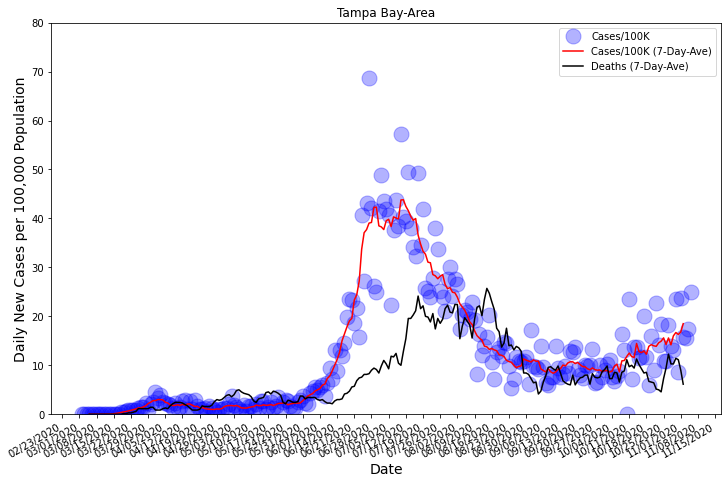

In [8]:
support.mpl_plot_from_group_d(df_covid, df_entity, "Tampa Bay-Area")

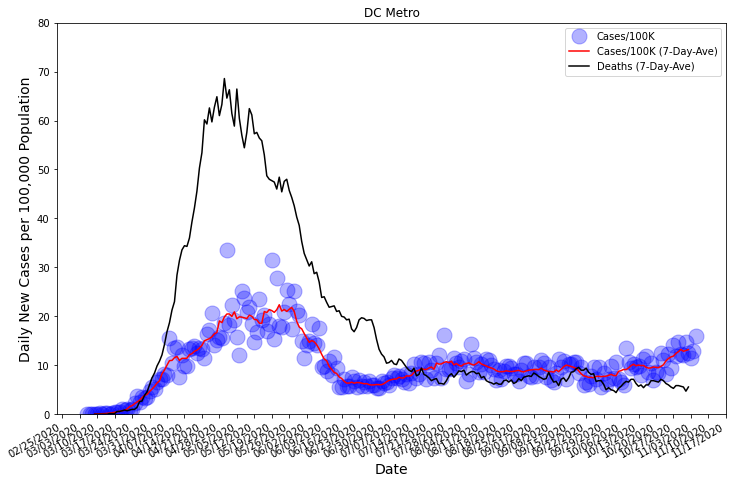

In [9]:
support.mpl_plot_from_group_d(df_covid, df_entity, "DC Metro")

In [11]:
    mytitle = "DC Metro"
    group = "DC Metro"


    df = support.frame_from_group(df_covid, df_entity, group)
    df['cases_7d_100k'].tail(20)

226     9.428471
227     9.478007
228     9.665834
229     9.575017
230     9.525480
231     9.783483
232    10.117855
233    10.904249
234    11.395488
235    11.707155
236    11.882598
237    12.423373
238    12.782513
239    13.236599
240    12.863010
241    13.024004
242    13.207702
243          NaN
244          NaN
245          NaN
Name: cases_7d_100k, dtype: float64

In [12]:
    xs = bqplot.DateScale()
    ys = bqplot.LinearScale()
    
    line = bqplot.Lines(x=df['date'],
                        y=df['cases'],
                        scales={'x': xs, 'y': ys})
    xax = bqplot.Axis(scale=xs)
    yax = bqplot.Axis(scale=ys, orientation='vertical')
    
    bqplot.Figure(marks=[line], axes=[xax, yax], title=mytitle, animate=True, enable_hover=True)
    # fig = plt.figure(title=mytitle)
    
    # line = plt.plot(x=df['date'].values, y=df['cases'].values)
    # plt.show()

Figure(axes=[Axis(scale=DateScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 6…

In [13]:
    fig = plt.figure(title=mytitle)
    
    line = plt.plot(x=df['date'].values, y=df['cases'].values)
    plt.show()